# Download and Organize Example Classifications

### These are preliminary classifications that demonstrate how to organize your own classifications or use the ones posted on svrimg.niu.edu

#### By default, the function "get_pred_tables" will download the example classifications.  You just have to provide a directory in which to save it.

##### NOTE: The directory must exist or you will get an error

In [1]:
from svrimg.utils.get_tables import get_pred_tables

egs = get_pred_tables(data_dir="../data/csvs/", example=True)

egs.head()

,Class Code,Class Name
UNID,,
199601180433z000000018,1,QLCS
199601180450z000000024,1,QLCS
199601180500z000000025,1,QLCS
199601181405z000000009,1,QLCS
199601181455z000000012,1,QLCS


### You can also organize your local predictions in yearly csv files. Look at the documentation to see how it works.

In [2]:
help(get_pred_tables)

Help on function get_pred_tables in module svrimg.utils.get_tables:

get_pred_tables(data_dir, url='https://nimbus.niu.edu/svrimg/data/', example=True, default_name='*_table_*.csv', csv_name='eg_classes_96-17', remove_first_row=False)
    Either downloads example predictions if 'example' is true, or combines your prediction
    tables in 'data_dir' into one table using the default naming format of 
    '*_table_*.csv' or whatever is passed into default_name. This will
    attempt to grab every year from 1996 - 2017, but will not fail if a year is missing. 
    By default, the first row in every year's table is example data on svrimg.org, and 
    it can be removed as long as 'remove_first_row' is True. By default, if there is a 
    repeated UNID, the last one is kept.  The theory here is that if you accidentally 
    clicked something, you would go back and fix it.  Thus, the nth time is likely 
    more accurate.
    
    Parameters
    ----------
    data_dir: str
        Base direc

### The following example saves a combined csv in "../data/csvs/" named "eg_classes_96-17.csv" and will search that directory for your csvs with the filename format "\*_table_\*", which basically says it will accept any value before or after "_table_", or, in other words, any csv file with that format.  This will work for all files that were downloaded and unmodified from the classification page (example: https://nimbus.niu.edu/svrimg/maps/1996_map.html).  Additionally, the first row is removed if remove_first_row is set to True.  This should always be the case for downloaded tables, because the first row is "example data".

E.g., 1997_table_1598590650584.csv

In [3]:
egs = get_pred_tables(data_dir="../data/csvs/", example=True, remove_first_row=True)

egs.head()

,Class Code,Class Name
UNID,,
199601180433z000000018,1,QLCS
199601180450z000000024,1,QLCS
199601180500z000000025,1,QLCS
199601181405z000000009,1,QLCS
199601181455z000000012,1,QLCS


### You can then use other helper functions to plot representative means for each classification subset. The image shown is the probability matched mean for each subset.

Alternatively, you can download the tar.gz file here (https://nimbus.niu.edu/svrimg/data/tars/tor/) and untar it into the data directory. This is probably better if you are downloading the entire dataset.

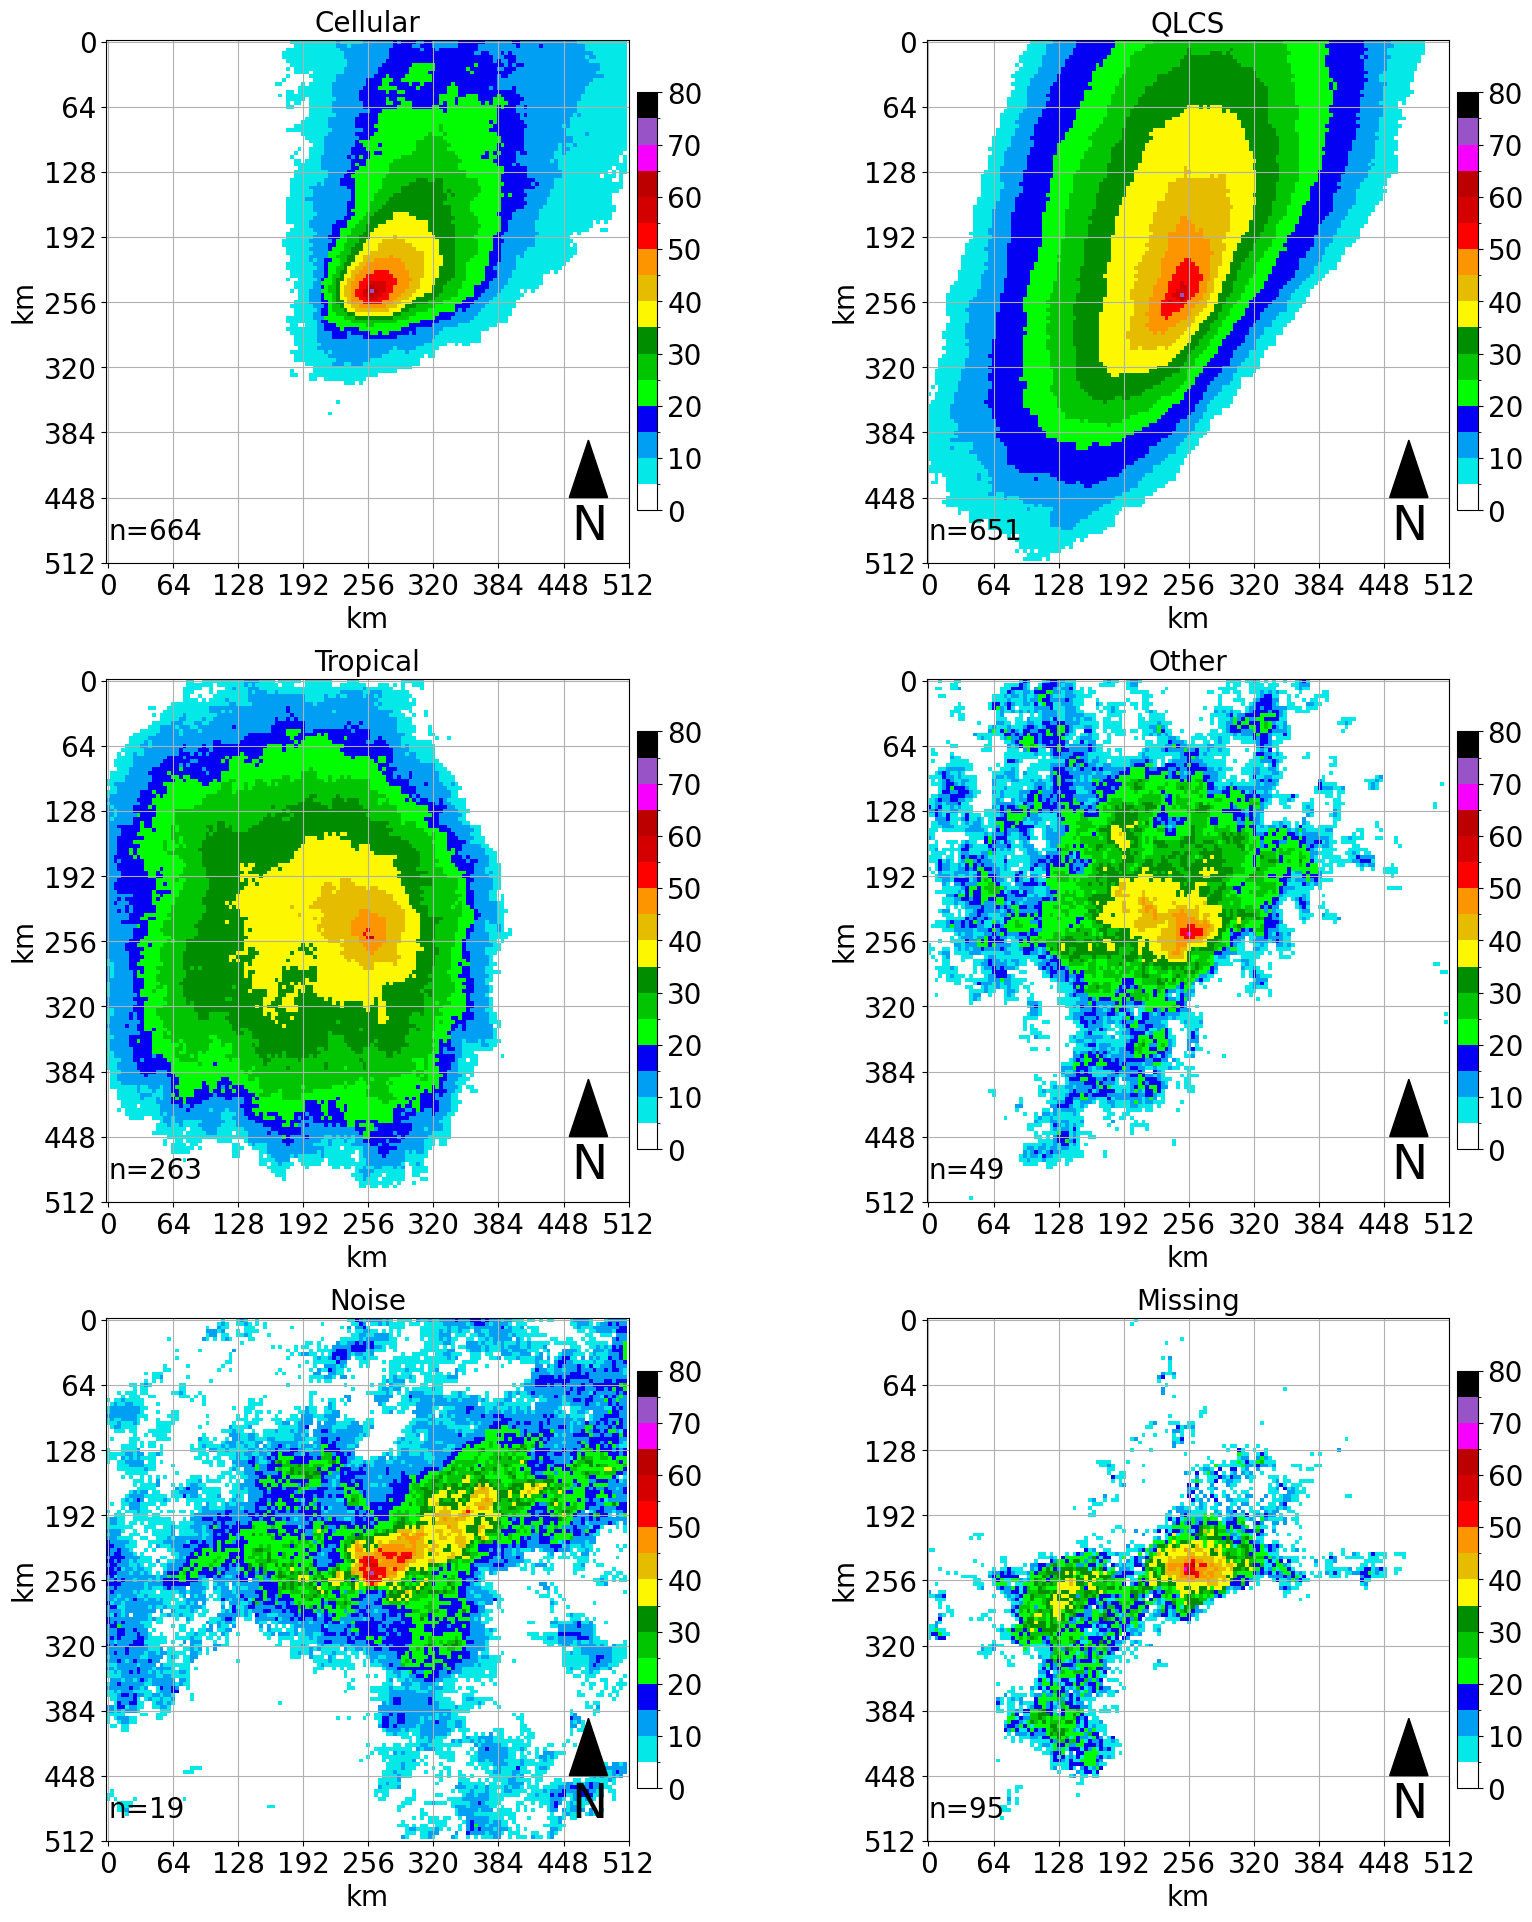

In [4]:
from svrimg.utils.get_images import get_img_list
from svrimg.mapping.map_helper import draw_box_plot
from svrimg.analysis.pmmean import _run_pmm_one_variable

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

i = [8, 7, 5, 4, 2, 1]
for cls in ['Cellular', 'QLCS', 'Tropical', 'Other', 'Noise', 'Missing']:
    
    sub = egs[egs["Class Name"]==cls].copy()
    
    imgs = get_img_list(sub.index.values, haz_type='tor', data_dir="../data")
    
    img = _run_pmm_one_variable(imgs)
    
    ax = plt.subplot(4, 3, i.pop())
    
    ax = draw_box_plot(ax, img, cbar_shrink=0.8)

    ax.set_title(cls, fontsize=20)
    
    ax.text(0, 130, "n={}".format(len(imgs)), fontsize=20)
    
plt.tight_layout()

# Save the image data in a keras friendly format

### The data are organized as follows:

Training: 1996 - 2011

Validation: 2012 - 2013

Testing: 2014 - 2017

### We can visualize the class breakdowns per subset.  First, get the svrgis index data and join it with the class data above.

In [5]:
from svrimg.utils.get_tables import get_table

svrgis = get_table(which="svrgis", haz_type="tor", data_dir="../data")

egs_join = egs.join(svrgis)

egs_join.head()

,Class Code,Class Name,om,tz,st,stf,stn,mag,inj,fat,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
UNID,,,,,,,,,,,,,,,,,,,,,
199601180433z000000018,1,QLCS,18,3,TX,48,2,1,1,0,...,0,0,0,1996-01-17-22:33:00,1/17/1996 22:33,1/18/1996 4:33,1996,1,18,4
199601180450z000000024,1,QLCS,24,3,TX,48,8,1,0,0,...,0,0,0,1996-01-17-22:50:00,1/17/1996 22:50,1/18/1996 4:50,1996,1,18,4
199601180500z000000025,1,QLCS,25,3,TX,48,9,1,0,0,...,0,0,0,1996-01-17-23:00:00,1/17/1996 23:00,1/18/1996 5:00,1996,1,18,5
199601181405z000000009,1,QLCS,9,3,MO,29,1,1,0,0,...,0,0,0,1996-01-18-08:05:00,1/18/1996 8:05,1/18/1996 14:05,1996,1,18,14
199601181455z000000012,1,QLCS,12,3,TN,47,1,0,0,0,...,0,0,0,1996-01-18-08:55:00,1/18/1996 8:55,1/18/1996 14:55,1996,1,18,14


### Now you can query the classifications by year.

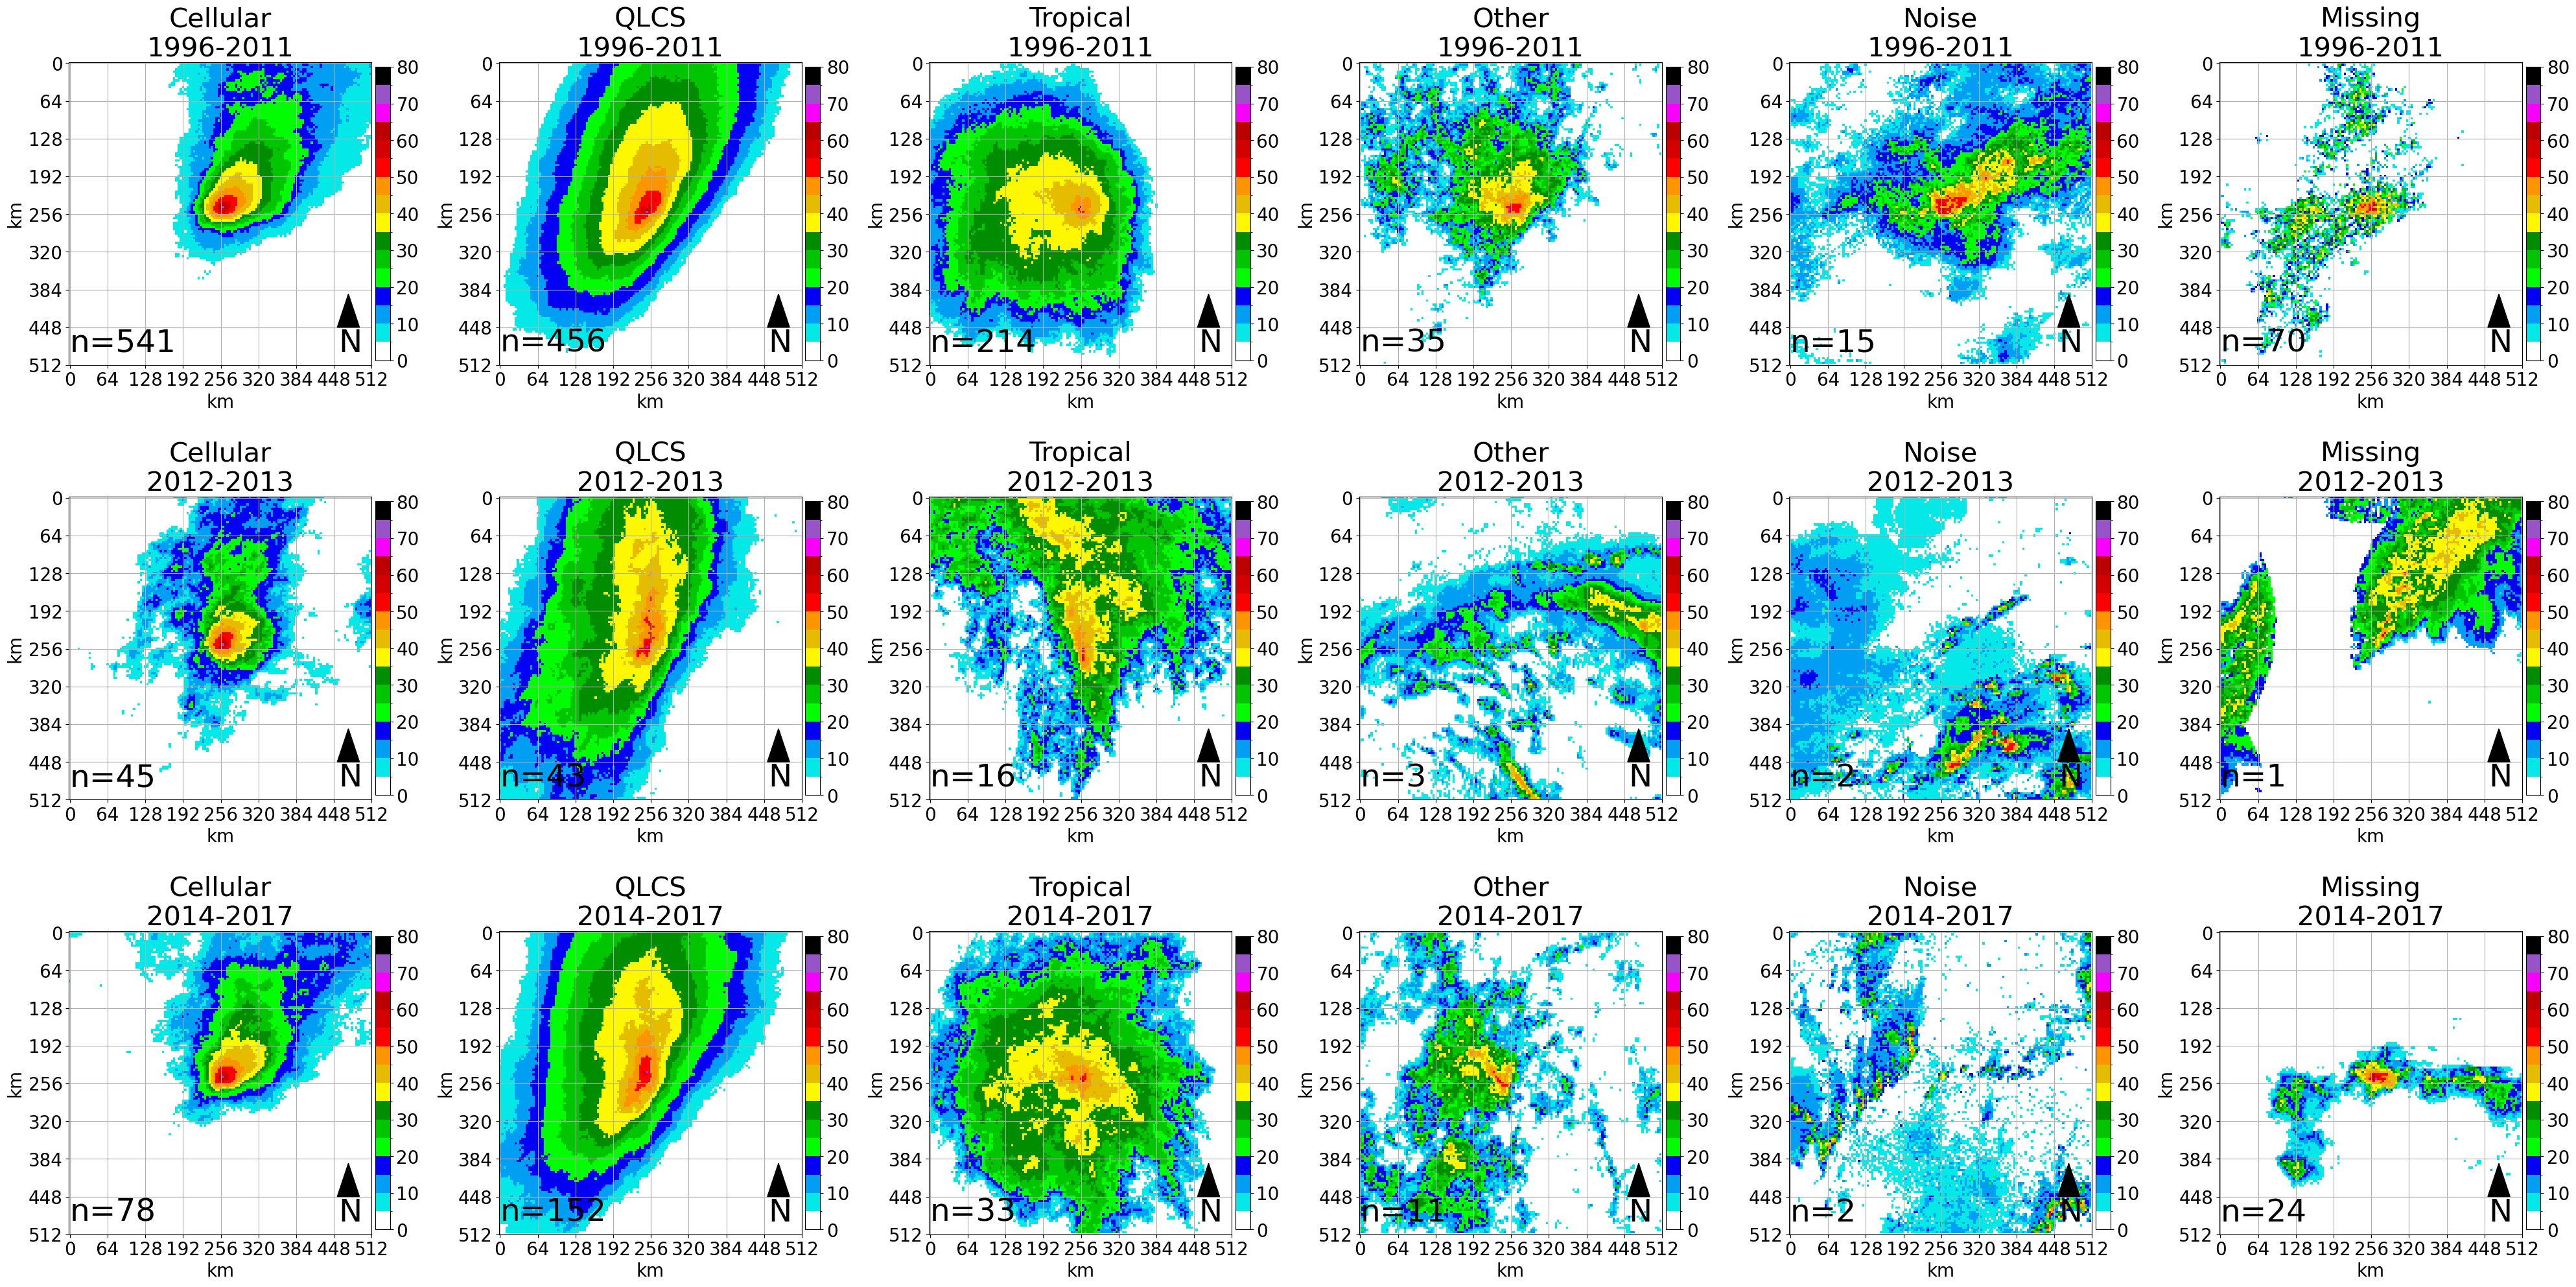

In [6]:
plt.rcParams['figure.figsize'] = 40, 40
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

i = 1

for subset in [(1996, 2011), (2012, 2013), (2014, 2017)]:
    
    sub_ = egs_join[(egs_join.yr >= subset[0]) & (egs_join.yr <= subset[1])].copy()
    
    for cls in ['Cellular', 'QLCS', 'Tropical', 'Other', 'Noise', 'Missing']:
    
        class_ = sub_[sub_["Class Name"]==cls].copy()

        imgs = get_img_list(class_.index.values, haz_type="tor", data_dir="../data")

        img = _run_pmm_one_variable(imgs)

        ax = plt.subplot(6, 6, i)

        ax = draw_box_plot(ax, img, cbar_shrink=0.8)

        ax.set_title(cls + "\n{}-{}".format(subset[0], subset[1]), fontsize=30)

        ax.text(0, 130, "n={}".format(len(imgs)), fontsize=35)
        
        i += 1
    
plt.tight_layout()

### Save the image data and classification data in pickles

In [7]:
import numpy as np
import pickle

for subset, name in zip([(1996, 2011), (2012, 2013), (2014, 2017)], ("train", "validation", "test")):
    
    sub_ = egs_join[(egs_join.yr >= subset[0]) & (egs_join.yr <= subset[1])].copy()
    
    imgs = get_img_list(sub_.index.values, haz_type="tor", data_dir="../data")
    
    imgs = np.expand_dims(imgs, axis=3)
    
    classes = sub_['Class Code'].values
    
    ## Assumes this folder exists
    pickle.dump([imgs, classes], open("../data/pkls/{}_{}_{}.pkl".format(subset[0], subset[1], name), "wb"))

### Read in the image data to be ready for Keras

In [8]:
x_train, y_train = pickle.load(open("../data/pkls/1996_2011_train.pkl", "rb"))

x_val, y_val = pickle.load(open("../data/pkls/2012_2013_validation.pkl", "rb"))

x_test, y_test = pickle.load(open("../data/pkls/2014_2017_test.pkl", "rb"))

### Almost ready for training!